# 월별 사망자 fbporphet 1

In [ ]:
pip install fbprophet # 프로펫 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # 판다스
df = pd.read_csv('/content/전국사망자수83-20.csv', encoding='cp949') # 데이터 로드

In [ ]:
df.head()

,시간,사망자수
0,1983년01월,23147
1,1983년02월,20099
2,1983년03월,22632
3,1983년04월,21767
4,1983년05월,18412


In [ ]:
df = df.rename(columns={'시간':'time', '사망자수':'death'})
df.tail() # 이름 바꿔줬다

,time,death
451,2020년08월,25289
452,2020년09월,24352
453,2020년10월,26488
454,2020년11월,25603
455,2020년12월,26866


In [ ]:
df["time"] = df["time"].str.replace(pat=r'년', repl=r'-', regex=True) # 한글 지워줬다

In [ ]:
df["time"] = df["time"].str.replace(pat=r'월', repl=r'', regex=True) # 한글 지워줬다

In [ ]:
df.head()

,time,death
0,1983-01,23147
1,1983-02,20099
2,1983-03,22632
3,1983-04,21767
4,1983-05,18412


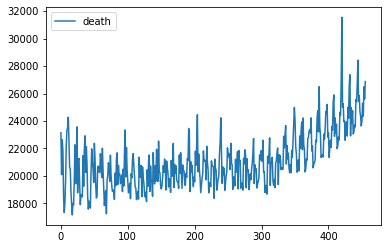

In [ ]:
from matplotlib import pyplot # 맷플롯립으로 사망자수를 그려봤다
df.plot()
pyplot.show() # 이쁘다

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds']) # 프로펫은 변수 이름을 ds, y 로 맞춰줘야 한단다

In [ ]:
from fbprophet import Prophet # 프로펫
model = Prophet() # 이제부터 너는 모델이다

In [ ]:
model.fit(df) # 학습

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_1year = list() # 마지막 년도인 2020년의 12개의 달을 모으려고 한다 
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 남에 꺼 따라했다

# 미래나 과거를 예측해보기 전 학습으로 사용한 데이터를 잘 예측하는지 확인해야 한단다
# in_sample_forecast라고 한다는데, 즉 train_set을 잘 예측하냐 보는거다

In [ ]:
forecast = model.predict(last_1year) # 모은 2020년을 예측해보라 하고 forecast에 저장했다

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()) 
# 뭐가 많은데 4가지 컬럼만 보겠다

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-01  26678.696671  25688.800774  27662.906471
1 2020-02-01  24902.786764  23903.600746  25938.152503
2 2020-03-01  26467.876730  25441.995492  27411.776112
3 2020-04-01  25145.232055  24134.328630  26162.796115
4 2020-05-01  24838.156514  23785.706338  25868.511372


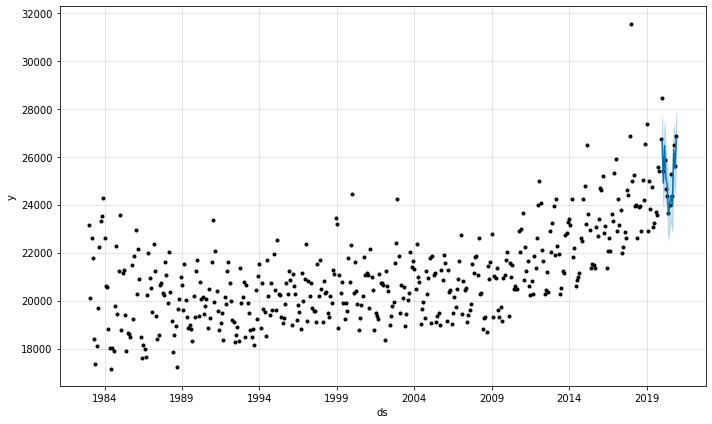

In [ ]:
model.plot(forecast)
pyplot.show()
# 프로펫은 내장함수 plot()가 있어서 좋다
# 검은점은 실제 데이터고 파란선이 예측값인데 엄청 잘 맞춘듯

In [ ]:
last_1year1 = list() # 이번엔 임의의 날짜 2021년 12달을 만든다
for i in range(1, 13):
  last_1year1.append(['2021-%02d' % i])
last_1year1 = pd.DataFrame(last_1year1, columns = ['ds'])
last_1year1['ds'] = pd.to_datetime(last_1year1['ds'])

# out_of_sample_forecast라고 한다는데, 그냥 21년 예측하는거다

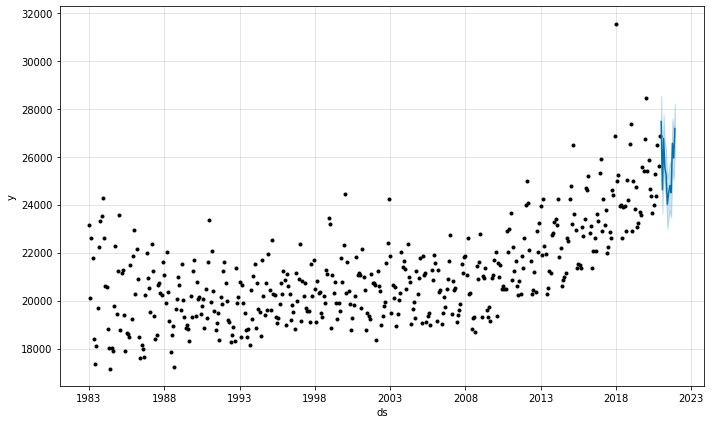

In [ ]:
forecast1 = model.predict(last_1year1)
model.plot(forecast1)
pyplot.show()
# 대충 잘 맞춘듯, 점이 많으니까 그냥 용과같아서 이쁘다

In [ ]:
# 이번에는 다르게 마지막 1년을 제외한 값으로 학습을 하고 마지막 1년을 예측한 뒤 
# 실제 마지막 1년과 비교하려고 한다 

# 마지막 12개월 제외시키기 
train = df.drop(df.index[-12:]) # train에서 뒤에 12개 제외
y_true = df['y'][-12:].values # 제외한 값은 y_true로 저장해둔다

# 모델 생성 후 학습
model = Prophet()
model.fit(train) # 12개가 빠진 train으로 학습

# 가상의 마지막 12개월 생성
last_1year = list()
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 실제 값이 들은게 아니다 !

# 예측, 비교하기 그리고 MAE를 살펴보기
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 549.020


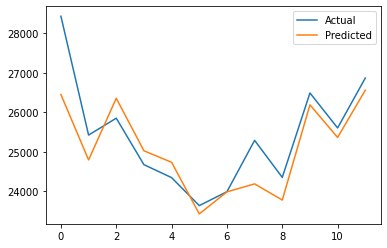

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
forecast1['yhat'] # 2021년 평균 사망자 수 예측값

0     27471.367073
1     24623.092114
2     26762.469120
3     25547.829114
4     25253.491414
5     24016.061013
6     24460.671511
7     24798.479693
8     24497.336888
9     26562.643835
10    25942.510742
11    27174.423642
Name: yhat, dtype: float64

In [ ]:
data2021 = [27230, 23795, 26550, 25077, 25577, 24398, 25748, 25953, 25674, 27775, 28363, 32634]
# 실제 2021년 사망자 수
# https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

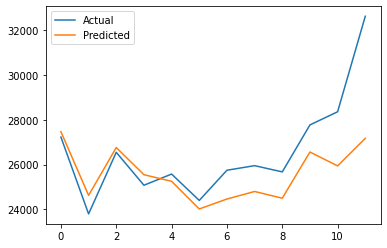

In [ ]:
pyplot.plot(data2021, label='Actual')
pyplot.plot(forecast1['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
last_1year2 = list() # 이번엔 임의의 날짜 2022년 12달을 만든다
for i in range(1, 13):
  last_1year2.append(['2022-%02d' % i])
last_1year2 = pd.DataFrame(last_1year2, columns = ['ds'])
last_1year2['ds'] = pd.to_datetime(last_1year2['ds'])

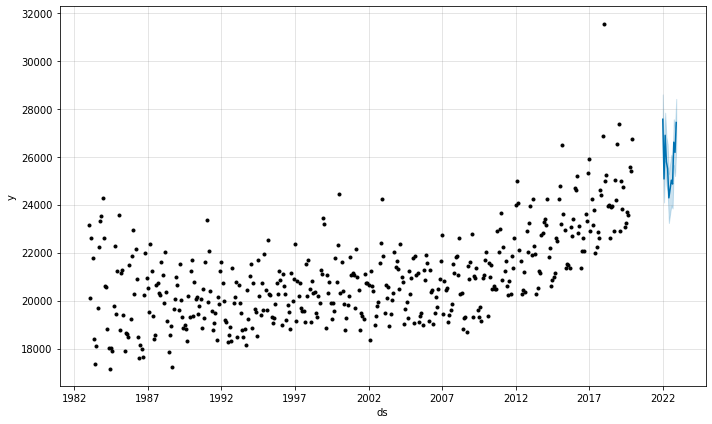

In [ ]:
forecast2 = model.predict(last_1year2)
model.plot(forecast2)
pyplot.show()

In [ ]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,25795.826408,26542.262115,28598.234595,25747.772523,25841.123087,1767.081835,1767.081835,1767.081835,1767.081835,1767.081835,1767.081835,0.0,0.0,0.0,27562.908243
1,2022-02-01,25828.994341,24093.262228,26127.872647,25776.675620,25878.121459,-756.515859,-756.515859,-756.515859,-756.515859,-756.515859,-756.515859,0.0,0.0,0.0,25072.478482
2,2022-03-01,25858.952474,25820.899050,27837.030538,25803.586334,25913.631936,1035.927314,1035.927314,1035.927314,1035.927314,1035.927314,1035.927314,0.0,0.0,0.0,26894.879788
3,2022-04-01,25892.120407,24816.691754,26826.480636,25833.324410,25951.006016,-105.790383,-105.790383,-105.790383,-105.790383,-105.790383,-105.790383,0.0,0.0,0.0,25786.330024
4,2022-05-01,25924.218407,24560.271756,26520.745494,25863.705387,25986.863171,-426.238617,-426.238617,-426.238617,-426.238617,-426.238617,-426.238617,0.0,0.0,0.0,25497.979789
5,2022-06-01,25957.386339,23235.648629,25285.240171,25892.868895,26024.231810,-1672.389868,-1672.389868,-1672.389868,-1672.389868,-1672.389868,-1672.389868,0.0,0.0,0.0,24284.996472
6,2022-07-01,25989.484339,23614.970545,25691.601522,25920.372631,26060.238419,-1349.168999,-1349.168999,-1349.168999,-1349.168999,-1349.168999,-1349.168999,0.0,0.0,0.0,24640.315340
7,2022-08-01,26022.652272,23971.001978,26083.919720,25950.381047,26097.070456,-1000.246167,-1000.246167,-1000.246167,-1000.246167,-1000.246167,-1000.246167,0.0,0.0,0.0,25022.406105
8,2022-09-01,26055.820205,23841.890707,25879.662503,25980.500594,26132.913302,-1194.445680,-1194.445680,-1194.445680,-1194.445680,-1194.445680,-1194.445680,0.0,0.0,0.0,24861.374525
9,2022-10-01,26087.918204,25650.492193,27562.281030,26007.810001,26170.073023,518.737814,518.737814,518.737814,518.737814,518.737814,518.737814,0.0,0.0,0.0,26606.656018


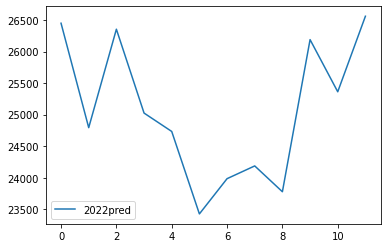

In [ ]:
pyplot.plot(forecast['yhat'], label='2022pred')
pyplot.legend()
pyplot.show()

# 2023년 예측

In [ ]:
last_1year3 = list() # 이번엔 임의의 날짜 2023년 12달을 만든다
for i in range(1, 13):
  last_1year3.append(['2023-%02d' % i])
last_1year3 = pd.DataFrame(last_1year3, columns = ['ds'])
last_1year3['ds'] = pd.to_datetime(last_1year3['ds'])

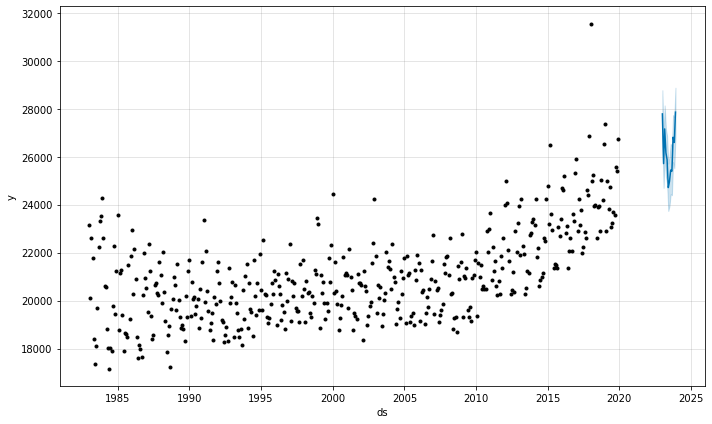

In [ ]:
forecast3 = model.predict(last_1year3)
model.plot(forecast3)
pyplot.show()

In [ ]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,26186.352070,26791.883985,28773.387335,26088.265030,26281.481314,1599.758768,1599.758768,1599.758768,1599.758768,1599.758768,1599.758768,0.0,0.0,0.0,27786.110837
1,2023-02-01,26219.520003,24700.825846,26780.547769,26117.784384,26318.335012,-505.601152,-505.601152,-505.601152,-505.601152,-505.601152,-505.601152,0.0,0.0,0.0,25713.918850
2,2023-03-01,26249.478135,26146.180824,28139.632975,26143.211824,26351.051561,910.852727,910.852727,910.852727,910.852727,910.852727,910.852727,0.0,0.0,0.0,27160.330863
3,2023-04-01,26282.646068,25171.605656,27157.344475,26170.858502,26388.585775,-114.675177,-114.675177,-114.675177,-114.675177,-114.675177,-114.675177,0.0,0.0,0.0,26167.970891
4,2023-05-01,26314.744068,24891.848256,26869.259109,26200.727105,26424.872256,-433.729304,-433.729304,-433.729304,-433.729304,-433.729304,-433.729304,0.0,0.0,0.0,25881.014763
5,2023-06-01,26347.912001,23736.205680,25713.259879,26228.977193,26462.533351,-1633.952191,-1633.952191,-1633.952191,-1633.952191,-1633.952191,-1633.952191,0.0,0.0,0.0,24713.959810
6,2023-07-01,26380.010000,23942.781685,25993.401406,26257.983732,26497.861932,-1411.587220,-1411.587220,-1411.587220,-1411.587220,-1411.587220,-1411.587220,0.0,0.0,0.0,24968.422780
7,2023-08-01,26413.177933,24438.427807,26539.125829,26284.420834,26534.922658,-970.338617,-970.338617,-970.338617,-970.338617,-970.338617,-970.338617,0.0,0.0,0.0,25442.839316
8,2023-09-01,26446.345866,24396.075664,26447.996005,26312.393480,26573.330263,-1046.902878,-1046.902878,-1046.902878,-1046.902878,-1046.902878,-1046.902878,0.0,0.0,0.0,25399.442988
9,2023-10-01,26478.443866,25778.923218,27739.171797,26338.917855,26608.740115,334.082076,334.082076,334.082076,334.082076,334.082076,334.082076,0.0,0.0,0.0,26812.525942


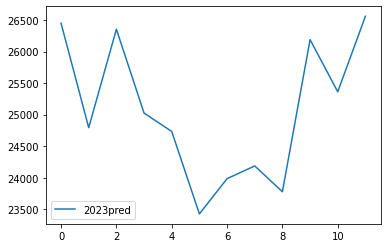

In [ ]:
pyplot.plot(forecast['yhat'], label='2023pred')
pyplot.legend()
pyplot.show()